#### README:
- Script used to find the microsphere diameters using *ImageJ*.
- We design a horizontal line in ImageJ and plot its intensity profile.
- Was necessary to positioned this line on the stem and the diameter of the microsphere.
- In each position we saved the profile intensity data in .csv format.

Obs.: The line on each position should be the same!

### Useful packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyLPD.MLtools as mlt

from SettingPLOTs import *
from matplotlib import rcParams

### Loading microsphere stem intensity profile data
Previously we knew the fiber diameter (125 um), with this like a reference, we calibrated the number of pixels and convert pixels in micrometers (um)

In [2]:
path = './Data/'
fname = 'Microsphere-stem.csv'

headers = ['Distance (pixels)','Intensity (a.u)']
df = pd.read_csv(path+fname, names=headers, skiprows=1)
df.head(2)

,Distance (pixels),Intensity (a.u)
0,0,26.9788
1,1,25.7475


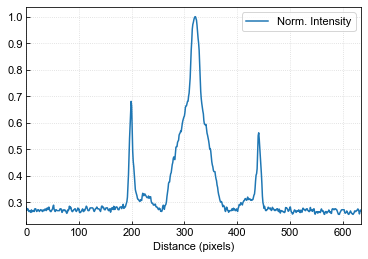

In [3]:
# Normalizing intensity
df['Norm. Intensity'] = df['Intensity (a.u)'] / df['Intensity (a.u)'].max()
 
df.plot(x='Distance (pixels)', y='Norm. Intensity');

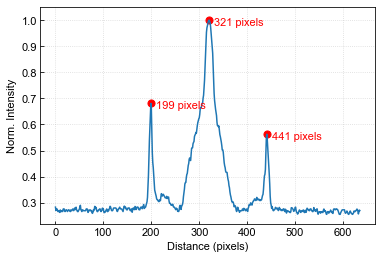

In [4]:
ind_max, maxtab, ind_min, mintab = mlt.peakdet(df['Norm. Intensity'].values, 0.1)

plt.plot(df['Distance (pixels)'], df['Norm. Intensity'])
plt.scatter(df['Distance (pixels)'][ind_max], maxtab, color='r', s=50)

ax = plt.gca()
for ii in np.arange(len(ind_max)):
    ax.annotate('{:.0f} pixels'.format(df['Distance (pixels)'][ind_max[ii]]), xy = (df['Distance (pixels)'][ind_max[ii]], maxtab[ii]), 
                xytext = (df['Distance (pixels)'][ind_max[ii]]+10, maxtab[ii]-.02), color = 'r')

plt.xlabel('Distance (pixels)')
plt.ylabel('Norm. Intensity')

plt.show()

With this we know that 125 um is equivalente to the difference of the first and last peak positions, so 125 um will be equivalent to (441-199) px = 242 px.

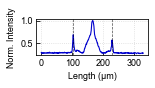

In [5]:
rcParams['font.size'] = '9'

df['Distance (μm)'] = 125/(df['Distance (pixels)'][ind_max[-1]]-df['Distance (pixels)'][ind_max[0]])*df['Distance (pixels)']

plt.figure(figsize=cm2inch(5.1,1.7))

plt.plot(df['Distance (μm)'], df['Norm. Intensity'], 'mediumblue', lw=1.1)
plt.axvline(x=df['Distance (μm)'][ind_max[0]], ymin=0, ymax=1, lw=0.7, c='k', ls='--', alpha=0.7)
plt.axvline(x=df['Distance (μm)'][ind_max[-1]], ymin=0, ymax=1, lw=0.7, c='k', ls='--', alpha=0.7)

plt.xlabel('Length (μm)')
plt.ylabel('Norm. Intensity')

plt.savefig('./Figures/'+'microsphere-stem-intensity-profile.svg')
plt.show()

### Loading microsphere diameter intensity profile data

We localized the imageJ line on the microsphere diameter and save the profile intensity data in .csv format

In [6]:
df1 = pd.read_csv(path+'Microsphere-diameter.csv', names=headers, skiprows=1)
df1.head(2)

,Distance (pixels),Intensity (a.u)
0,0,26.9374
1,1,26.9999


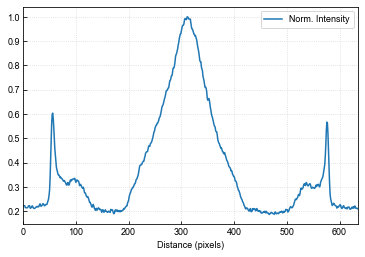

In [7]:
df1['Norm. Intensity'] = df1['Intensity (a.u)'] / df1['Intensity (a.u)'].max()
 
df1.plot(x='Distance (pixels)', y='Norm. Intensity');

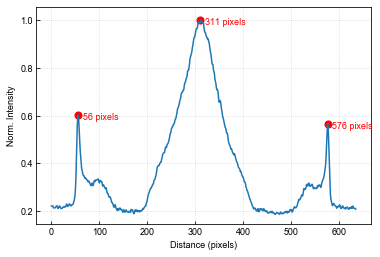

In [8]:
ind_max, maxtab, ind_min, mintab = mlt.peakdet(df1['Norm. Intensity'].values, 0.1)

plt.plot(df1['Distance (pixels)'], df1['Norm. Intensity'])
plt.scatter(df1['Distance (pixels)'][ind_max], maxtab, color='r', s=50)

ax = plt.gca()
for ii in np.arange(len(ind_max)):
    ax.annotate('{:.0f} pixels'.format(df1['Distance (pixels)'][ind_max[ii]]), xy = (df1['Distance (pixels)'][ind_max[ii]], maxtab[ii]), 
                xytext = (df1['Distance (pixels)'][ind_max[ii]]+10, maxtab[ii]-.02), color = 'r')

plt.xlabel('Distance (pixels)')
plt.ylabel('Norm. Intensity')

plt.show()

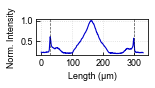

In [9]:
plt.figure(figsize=cm2inch(5.1,1.7))

plt.plot(df['Distance (μm)'], df1['Norm. Intensity'], 'mediumblue', lw=1.1)
plt.axvline(x=df['Distance (μm)'][ind_max[0]], ymin=0, ymax=1, lw=0.7, c='k', ls='--', alpha=0.7)
plt.axvline(x=df['Distance (μm)'][ind_max[-1]], ymin=0, ymax=1, lw=0.7, c='k', ls='--', alpha=0.7)

plt.xlabel('Length (μm)')
plt.ylabel('Norm. Intensity')
plt.savefig('./Figures/'+'microsphere-diameter-intensity-profile.svg')
plt.show()

So, it is possible to find the microsphere diameter:

In [10]:
D_sph = df['Distance (μm)'][ind_max[-1]] - df['Distance (μm)'][ind_max[0]]

print('El diámetro de la esfera es: {:.0f} μm'.format(D_sph))

El diámetro de la esfera es: 269 μm
